In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_pickle('df_model')
df = df.dropna(subset =['final_years', 'final_make'])
df =df.drop(['make','make_title', 'year', 'years', 'title_lower', 'URL', 'bikeTitle', 'attributes',], axis =1)
df = df[df['final_years'].astype(str).str.isdigit()]
df['odometer'] = df.odometer.str.extract('(^\d*)')
df[["final_years"]] = df[['final_years']].apply(pd.to_numeric)
df['Price']= df['Price'].apply(lambda x: x.replace('$',''))
df['Price']= df['Price'].apply(lambda x: x.replace(',',''))
df[['Price']] = df[['Price']].apply(pd.to_numeric)
df[['odometer']] = df[['odometer']].apply(pd.to_numeric)
df =df.reset_index(drop=True)
df = df[df['Price']<50000]
df = df[df['odometer']<100000]
df = df[df['final_years']>1960]
df = df[df['final_years']<2022]
df.drop("VIN", inplace =True, axis =1)
df =df.reset_index(drop=True)
df_numbers = df.select_dtypes(exclude=object)

# Baseline Model

We are using the 'odometer' feature as it is more correlated with price

In [5]:
# Use train_test_split to create training data and testing data
X = df_numbers.drop(['Price'], axis=1)
y = df_numbers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

/Users/avijames/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


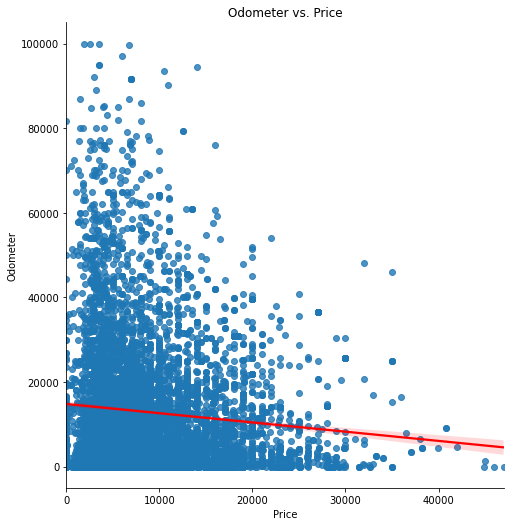

In [8]:
sns.lmplot(data=df_numbers, x='Price', y='odometer', size=7,line_kws={'color':'red'})
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.title('Odometer vs. Price');

The graph above shows that there is a negative linear line between price and mileage.

Now we will get the r-squared values for this model

In [9]:
# We are going to perform 3 separate train-test splits within our X_train and y_train, 
# then we will find both the train and the test scores for each
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['odometer']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.008490558195936063
Validation score: 0.0026889457523641136


Our baseline model showed that our r-squared value is 0.003.